### Forecast the Airlines Passengers data set. Prepare a document for each model explaining how many dummy variables you have created and RMSE value for each model. Finally which model you will use for Forecasting.

# 1. Import Necesary Libraries

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import statsmodels.api as smf
import warnings
warnings.filterwarnings('ignore')

# 2. Import Data

In [2]:
air=pd.read_excel('Airlines+Data.xlsx')
air

,Month,Passengers
0,1995-01-01,112
1,1995-02-01,118
2,1995-03-01,132
3,1995-04-01,129
4,1995-05-01,121
...,...,...
91,2002-08-01,405
92,2002-09-01,355
93,2002-10-01,306
94,2002-11-01,271


# 3.Data Understanding

In [3]:
air.shape

(96, 2)

In [4]:
air.isnull().sum()

Month         0
Passengers    0
dtype: int64

In [5]:
air.dtypes

Month         datetime64[ns]
Passengers             int64
dtype: object

In [6]:
air.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 96 entries, 0 to 95
Data columns (total 2 columns):
 #   Column      Non-Null Count  Dtype         
---  ------      --------------  -----         
 0   Month       96 non-null     datetime64[ns]
 1   Passengers  96 non-null     int64         
dtypes: datetime64[ns](1), int64(1)
memory usage: 1.6 KB


In [7]:
air.describe()

,Passengers
count,96.000000
mean,213.708333
std,71.918216
min,104.000000
25%,156.000000
50%,200.000000
75%,264.750000
max,413.000000


## Visualization

<AxesSubplot:>

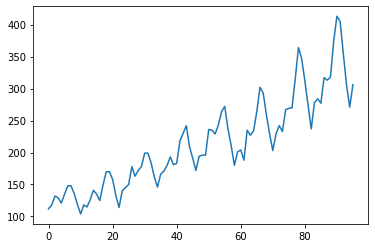

In [8]:
air.Passengers.plot()

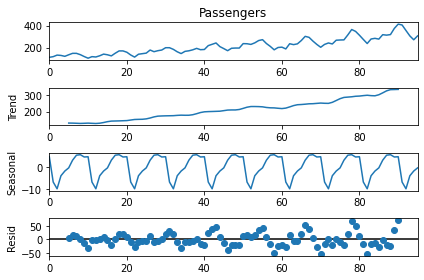

In [9]:
seasonal_ts_add=smf.tsa.seasonal_decompose(air['Passengers'],freq=10)
seasonal_ts_add.plot()
plt.show()

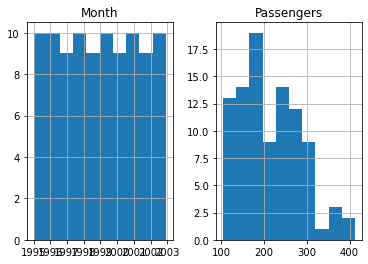

In [10]:
air.hist()
plt.show()

### Converting into month and year using Datetime 

In [11]:
air['Date']=pd.to_datetime(air.Month,format="%b-%y") #c standard format codes

In [12]:
# Extracting Day, weekday name, month name, year from the Date column using 
# Date functions from pandas

In [13]:
air['month']=air.Date.dt.strftime("%b") #Month Extraction
air['Year']=air.Date.dt.strftime("%y")  #Year Extraction

### Day and Weekday Extraction

In [14]:
#Air["Day"] = Air.Date.dt.strftime("%d")
#Air["wkday"] = Air.Date.dt.strftime("%A")

In [15]:
air

,Month,Passengers,Date,month,Year
0,1995-01-01,112,1995-01-01,Jan,95
1,1995-02-01,118,1995-02-01,Feb,95
2,1995-03-01,132,1995-03-01,Mar,95
3,1995-04-01,129,1995-04-01,Apr,95
4,1995-05-01,121,1995-05-01,May,95
...,...,...,...,...,...
91,2002-08-01,405,2002-08-01,Aug,02
92,2002-09-01,355,2002-09-01,Sep,02
93,2002-10-01,306,2002-10-01,Oct,02
94,2002-11-01,271,2002-11-01,Nov,02


<AxesSubplot:xlabel='Year', ylabel='Passengers'>

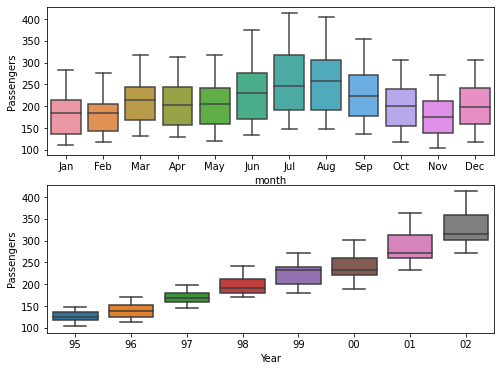

In [20]:
# Boxplot for ever
plt.figure(figsize=(8,6))
plt.subplot(211)
sns.boxplot(x="month",y="Passengers",data=air)
plt.subplot(212)
sns.boxplot(x="Year",y="Passengers",data=air)

<AxesSubplot:xlabel='Year', ylabel='Passengers'>

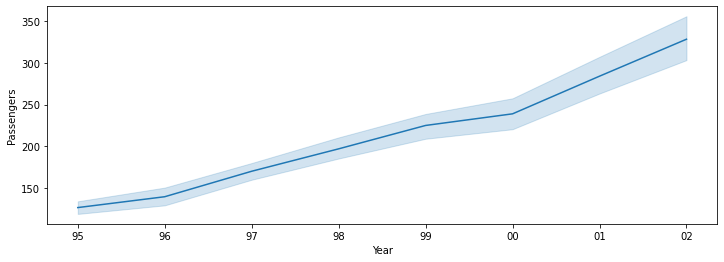

In [36]:
plt.figure(figsize=(12,4))
sns.lineplot(x="Year",y="Passengers",data=air1)

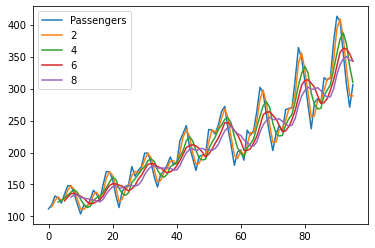

In [39]:
#to reduce the fluctuations
air.Passengers.plot()
for i in range(2,10,2):
    air["Passengers"].rolling(i).mean().plot(label=str(i))
plt.legend(loc=2)

In [40]:
#Get dummies
month_dummies = pd.DataFrame(pd.get_dummies(air['month']))
air1 = pd.concat([air,month_dummies],axis = 1)
air1.head()

,Month,Passengers,Date,month,Year,Apr,Aug,Dec,Feb,Jan,Jul,Jun,Mar,May,Nov,Oct,Sep
0,1995-01-01,112,1995-01-01,Jan,95,0,0,0,0,1,0,0,0,0,0,0,0
1,1995-02-01,118,1995-02-01,Feb,95,0,0,0,1,0,0,0,0,0,0,0,0
2,1995-03-01,132,1995-03-01,Mar,95,0,0,0,0,0,0,0,1,0,0,0,0
3,1995-04-01,129,1995-04-01,Apr,95,1,0,0,0,0,0,0,0,0,0,0,0
4,1995-05-01,121,1995-05-01,May,95,0,0,0,0,0,0,0,0,1,0,0,0


In [41]:
air1["t"] = np.arange(1,97)
air1["t_squared"] = air1["t"]*air1["t"]
air1["log_Passengers"] = np.log(air1["Passengers"])
air1.columns
air1.head()

,Month,Passengers,Date,month,Year,Apr,Aug,Dec,Feb,Jan,Jul,Jun,Mar,May,Nov,Oct,Sep,t,t_squared,log_Passengers
0,1995-01-01,112,1995-01-01,Jan,95,0,0,0,0,1,0,0,0,0,0,0,0,1,1,4.718499
1,1995-02-01,118,1995-02-01,Feb,95,0,0,0,1,0,0,0,0,0,0,0,0,2,4,4.770685
2,1995-03-01,132,1995-03-01,Mar,95,0,0,0,0,0,0,0,1,0,0,0,0,3,9,4.882802
3,1995-04-01,129,1995-04-01,Apr,95,1,0,0,0,0,0,0,0,0,0,0,0,4,16,4.859812
4,1995-05-01,121,1995-05-01,May,95,0,0,0,0,0,0,0,0,1,0,0,0,5,25,4.795791


## Splitting the Data

In [52]:
Train=air1.iloc[0:72,:]
Train.head()

,Month,Passengers,Date,month,Year,Apr,Aug,Dec,Feb,Jan,Jul,Jun,Mar,May,Nov,Oct,Sep,t,t_squared,log_Passengers
0,1995-01-01,112,1995-01-01,Jan,95,0,0,0,0,1,0,0,0,0,0,0,0,1,1,4.718499
1,1995-02-01,118,1995-02-01,Feb,95,0,0,0,1,0,0,0,0,0,0,0,0,2,4,4.770685
2,1995-03-01,132,1995-03-01,Mar,95,0,0,0,0,0,0,0,1,0,0,0,0,3,9,4.882802
3,1995-04-01,129,1995-04-01,Apr,95,1,0,0,0,0,0,0,0,0,0,0,0,4,16,4.859812
4,1995-05-01,121,1995-05-01,May,95,0,0,0,0,0,0,0,0,1,0,0,0,5,25,4.795791


In [53]:
Test=air1.iloc[72:,:]
Test.head()

,Month,Passengers,Date,month,Year,Apr,Aug,Dec,Feb,Jan,Jul,Jun,Mar,May,Nov,Oct,Sep,t,t_squared,log_Passengers
72,2001-01-01,242,2001-01-01,Jan,01,0,0,0,0,1,0,0,0,0,0,0,0,73,5329,5.488938
73,2001-02-01,233,2001-02-01,Feb,01,0,0,0,1,0,0,0,0,0,0,0,0,74,5476,5.451038
74,2001-03-01,267,2001-03-01,Mar,01,0,0,0,0,0,0,0,1,0,0,0,0,75,5625,5.587249
75,2001-04-01,269,2001-04-01,Apr,01,1,0,0,0,0,0,0,0,0,0,0,0,76,5776,5.594711
76,2001-05-01,270,2001-05-01,May,01,0,0,0,0,0,0,0,0,1,0,0,0,77,5929,5.598422


## Build Model And RMSE Value

### Linear Model

In [58]:
import statsmodels.formula.api as smf
linear_model = smf.ols("Passengers~t",data=Train).fit()
pred_linear= pd.Series(linear_model.predict(pd.DataFrame(Test['t'])))
rmse_linear= np.sqrt(np.mean(np.array(Test['Passengers'])-np.array(pred_linear))**2)
rmse_linear

28.039509507578206

### Exponentail Model

In [59]:
Exp = smf.ols('log_Passengers~t',data=Train).fit()
pred_Exp = pd.Series(Exp.predict(pd.DataFrame(Test['t'])))
rmse_Exp = np.sqrt(np.mean((np.array(Test['Passengers'])-np.array(np.exp(pred_Exp)))**2))
rmse_Exp

42.552328946004586

### Quadratic Model

In [64]:
Quad = smf.ols("Passengers~t+t_squared",data=Train).fit()
pred_Quad = pd.Series(Quad.predict(Test[["t","t_squared"]]))
rmse_Quad = np.sqrt(np.mean((np.array(Test['Passengers'])-np.array(pred_Quad))**2))
rmse_Quad

51.99073640155471

### Additive seasonality Model

In [65]:
add_sea = smf.ols('Passengers~Jan+Feb+Mar+Apr+May+Jun+Jul+Aug+Sep+Oct+Nov',data=Train).fit()
pred_add_sea = pd.Series(add_sea.predict(Test[['Jan','Feb','Mar','Apr','May','Jun','Jul','Aug','Sep','Oct','Nov']]))
rmse_add_sea = np.sqrt(np.mean((np.array(Test['Passengers'])-np.array(pred_add_sea))**2))
rmse_add_sea

127.26451565320343

### Additive Seasonality Quadratic

In [68]:
add_sea_Quad = smf.ols('Passengers~t+t_squared+Jan+Feb+Mar+Apr+May+Jun+Jul+Aug+Sep+Oct+Nov',data=Train).fit()
pred_add_sea_quad = pd.Series(add_sea_Quad.predict(Test[['Jan','Feb','Mar','Apr','May','Jun','Jul','Aug','Sep','Oct','Nov','t','t_squared']]))
rmse_add_sea_quad = np.sqrt(np.mean((np.array(Test['Passengers'])-np.array(pred_add_sea_quad))**2))
rmse_add_sea_quad

35.24160848595612

### Multiplicative Seasonality

In [70]:
Mul_sea = smf.ols('log_Passengers~Jan+Feb+Mar+Apr+May+Jun+Jul+Aug+Sep+Oct+Nov',data = Train).fit()
pred_Mult_sea = pd.Series(Mul_sea.predict(Test))
rmse_Mult_sea = np.sqrt(np.mean((np.array(Test['Passengers'])-np.array(np.exp(pred_Mult_sea)))**2))
rmse_Mult_sea

132.18762800263445

### Multiplicative Additive Seasonality

In [71]:
Mul_Add_sea = smf.ols('log_Passengers~t+Jan+Feb+Mar+Apr+May+Jun+Jul+Aug+Sep+Oct+Nov',data = Train).fit()
pred_Mult_add_sea = pd.Series(Mul_Add_sea.predict(Test))
rmse_Mult_add_sea = np.sqrt(np.mean((np.array(Test['Passengers'])-np.array(np.exp(pred_Mult_add_sea)))**2))
rmse_Mult_add_sea

11.71467024678088

### Compare the results

In [72]:
data = {"MODEL":pd.Series(["rmse_linear","rmse_Exp","rmse_Quad","rmse_add_sea","rmse_add_sea_quad","rmse_Mult_sea","rmse_Mult_add_sea"]),"RMSE_Values":pd.Series([rmse_linear,rmse_Exp,rmse_Quad,rmse_add_sea,rmse_add_sea_quad,rmse_Mult_sea,rmse_Mult_add_sea])}
table_rmse=pd.DataFrame(data)
table_rmse.sort_values(['RMSE_Values'])

,MODEL,RMSE_Values
6,rmse_Mult_add_sea,11.714670
0,rmse_linear,28.039510
4,rmse_add_sea_quad,35.241608
1,rmse_Exp,42.552329
2,rmse_Quad,51.990736
3,rmse_add_sea,127.264516
5,rmse_Mult_sea,132.187628


### Predicting New Data

In [74]:
data = [['2003-01-01', 'Jan'], ['2003-02-01', 'Feb'], ['2003-03-01', 'Mar'],['2003-04-01', 'Apr'],['2003-5-01', 'May'],['2003-06-01', 'Jun'],
        ['2003-07-01', 'Jul'],['2003-08-01', 'Aug'],['2003-09-01', 'Sep'],['2003-10-01', 'Oct'],['2003-11-01', 'Nov'],['2003-12-01', 'Dec']]
forecast = pd.DataFrame(data, columns = ['Date', 'Months'])
forecast

,Date,Months
0,2003-01-01,Jan
1,2003-02-01,Feb
2,2003-03-01,Mar
3,2003-04-01,Apr
4,2003-5-01,May
5,2003-06-01,Jun
6,2003-07-01,Jul
7,2003-08-01,Aug
8,2003-09-01,Sep
9,2003-10-01,Oct


In [75]:
# Create dummies and T and T-Squared columns

dummies = pd.DataFrame(pd.get_dummies(forecast['Months']))
forecast1 = pd.concat([forecast,dummies],axis = 1)

forecast1["t"] = np.arange(1,13)   
forecast1["t_squared"] = forecast1["t"]*forecast1["t"] 
print("\nAfter Dummy, T and T-Square\n\n",forecast1.head())


After Dummy, T and T-Square

          Date Months  Apr  Aug  Dec  Feb  Jan  Jul  Jun  Mar  May  Nov  Oct  \
0  2003-01-01    Jan    0    0    0    0    1    0    0    0    0    0    0   
1  2003-02-01    Feb    0    0    0    1    0    0    0    0    0    0    0   
2  2003-03-01    Mar    0    0    0    0    0    0    0    1    0    0    0   
3  2003-04-01    Apr    1    0    0    0    0    0    0    0    0    0    0   
4   2003-5-01    May    0    0    0    0    0    0    0    0    1    0    0   

   Sep  t  t_squared  
0    0  1          1  
1    0  2          4  
2    0  3          9  
3    0  4         16  
4    0  5         25  


In [77]:
# Forecasting using Multiplicative Additive Seasonality Model

model_full = smf.ols('log_Passengers~t+Jan+Feb+Mar+Apr+May+Jun+Jul+Aug+Sep+Oct+Nov+Dec',data =air1).fit()
pred_new  = pd.Series(model_full.predict(forecast1))

forecast1["Forecasted_log"] = pd.Series(pred_new)
forecast1['Forecasted_Passengers'] = np.exp(forecast1['Forecasted_log'])

In [78]:
# Final Prediction for next 12 months

Final_predict = forecast1.loc[:, ['Date', 'Forecasted_Passengers']] 
Final_predict

,Date,Forecasted_Passengers
0,2003-01-01,109.176148
1,2003-02-01,110.331245
2,2003-03-01,127.315234
3,2003-04-01,123.200587
4,2003-5-01,122.399578
5,2003-06-01,138.536397
6,2003-07-01,154.066959
7,2003-08-01,153.741209
8,2003-09-01,137.693733
9,2003-10-01,120.894736


# THE END!